<a href="https://colab.research.google.com/github/samarthgangurde01/Cardiovascular-Risk-Prediction/blob/main/Capston_Project_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<u>Project Title:-Cardiovascular Risk Prediction</u>**

---

## **What is mean by cardiovascular risk?**
  It is Heart and blood vessel disease (also called heart disease) includes numerous problems, many of which are related to a process called atherosclerosis

Atherosclerosis is a condition that develops when a substance called plaque builds up in the walls of the arteries. This buildup narrows the arteries, making it harder for blood to flow through. If a blood clot forms, it can block the blood flow. This can cause a heart attack or stroke.

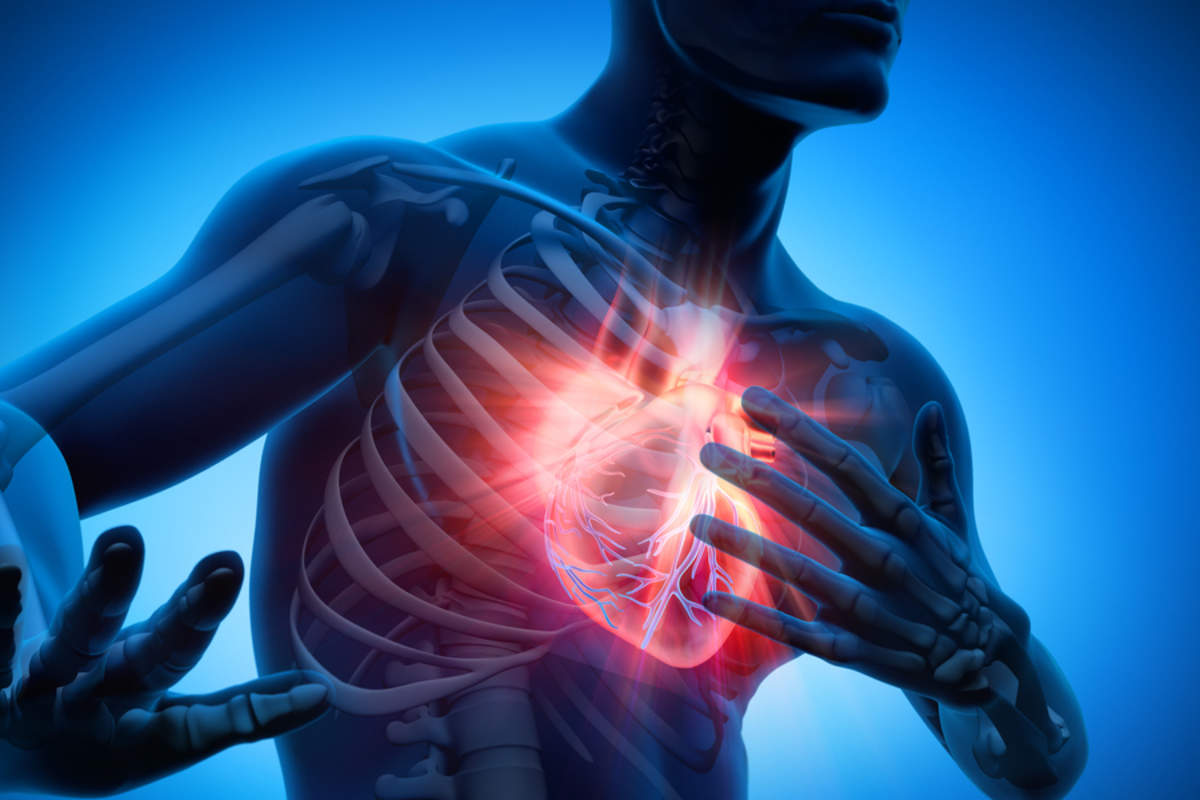

## **Key facts regarding cardiovascular risk by WHO servey**





*   Cardiovascular diseases are the leading cause of death globally.
*   An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
*   Over three quarters of CVD deaths take place in low- and middle-income countries.
*   Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.
*   It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.
resource:-https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)




#### **Reason behind the project** :- 

 As Cardiovascular disease is a significant and ever-growing problem in all over nations. It pressing interest as developing countries experience a change in lifestyle which introduces novel risk factors for cardiovascular disease. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk 


**Importing the Dependencies**

---



In [ ]:
#importing required labraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### **Data Collection**

---



In [ ]:
# loading the csv data to a Pandas DataFrame
df=pd.read_csv('/content/drive/MyDrive/projects/Cardiovascular Disease predictor/data_cardiovascular_risk.csv')

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk offuture coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [ ]:
# print first 5 rows of the dataset
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

**Variables :**

Each feature is a potential risk factor. There are both Demographic, behavioural and medical risk factors.

*  Demographic

1.   sex:- male or female
2.   age:- age of the patient

*   Behavioural

1.   Is_smoking( do person smoke currently)
2.   cigsPerDay( number of cigarretts person prefers, even half a cigarette)


*   Medical( history)

1.  BPMeds: whether or not the patient was on blood pressure medication  
2.   prevalentStroke: whether or not the patient had previously had a stroke
3.   prevalentHyp: whether or not the patient was hypertensive 
4.   diabetes: whether or not the patient had diabetes 




*   Medical(current)


1.   totChol: total cholesterol level 
2.   sysBP: systolic blood pressure 
3.   diaBP: diastolic blood pressure
4.   BMI: Body Mass Index
5.   heartRate: heart rate 
6.   glucose: glucose level 
   
*  Predict variable
1.   10 year risk of coronary heart disease TenYearCHD ( 1  means 'Yes', 0 means 'NO')














In [ ]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# statistical measures about the data
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### **Preprocessing**

---



### **Handeling Missing values**

Why do we need to handle missing values?

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first



In [ ]:
# checking for missing values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
print(df[['education','cigsPerDay','BPMeds', 'totChol', 'glucose']].head(10))

   education  cigsPerDay  BPMeds  totChol  glucose
0        2.0         3.0     0.0    221.0     80.0
1        4.0         0.0     0.0    212.0     75.0
2        1.0        10.0     0.0    250.0     94.0
3        1.0        20.0     0.0    233.0     94.0
4        1.0        30.0     0.0    241.0     77.0
5        3.0         0.0     0.0    272.0     65.0
6        1.0         0.0     0.0    238.0     79.0
7        4.0        35.0     0.0    295.0     63.0
8        2.0        20.0     NaN    220.0     79.0
9        2.0         0.0     0.0    326.0      NaN


In [ ]:
## Lets go and see the percentage of missing values
df.isnull().mean()

id                 0.000000
age                0.000000
education          0.025664
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.006490
BPMeds             0.012979
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011209
sysBP              0.000000
diaBP              0.000000
BMI                0.004130
heartRate          0.000295
glucose            0.089676
TenYearCHD         0.000000
dtype: float64

**As per table only Glucose variable contains considerable missing values**

In [ ]:
#calculating median of glucose column
median=df.glucose.median()
median

78.0

In [ ]:
#creating function to replace NAN with median
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [ ]:
#printing the columnm glucose and new column glucose_median
impute_nan(df,'glucose',median)
print(df[['glucose','glucose_median']].head(10))

   glucose  glucose_median
0     80.0            80.0
1     75.0            75.0
2     94.0            94.0
3     94.0            94.0
4     77.0            77.0
5     65.0            65.0
6     79.0            79.0
7     63.0            63.0
8     79.0            79.0
9      NaN            78.0


**we replaced NaN values of Glucose to median of Glucose column**

In [ ]:

print(df['glucose'].std())
print(df['glucose_median'].std())

24.244753474941934
23.161264709452595


In [ ]:
#importing required packages
import matplotlib.pyplot as plt
%matplotlib inline

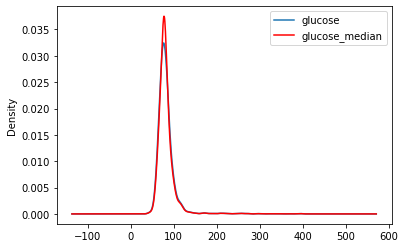

In [ ]:
#plotting sub plot for comparing std of glucose and glucose_median 
fig = plt.figure()
ax = fig.add_subplot(111)
df['glucose'].plot(kind='kde', ax=ax)
df.glucose_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Missing values from glucose variable was more as compare to othes missing values and whole dataset. so we cahnged missing values of glucose into median of glucose column which was 78.0**

In [ ]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
glucose_median       0
dtype: int64

In [ ]:
#droping column glucose and other remaining null values
df.drop(columns=['glucose'],inplace=True)
df=df.dropna()

In [ ]:
# checking for missing values( after droping if any)
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
glucose_median     0
dtype: int64

### **Handeling Duplicate values**
Why is it important to remove duplicate records from my data?

"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.

In [ ]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**As there is no duplicates. it will save our time from Handeling Duplicate values,lets move further to EDA**

## **Handeling Outliers**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

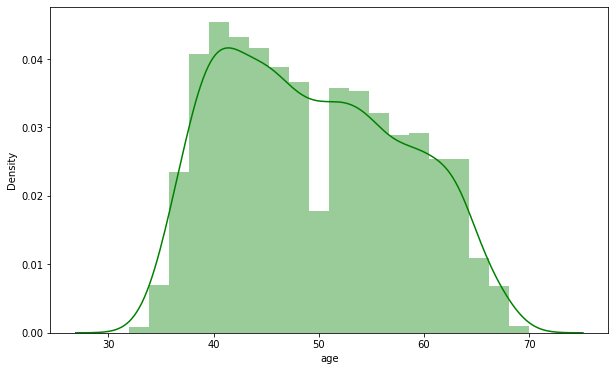

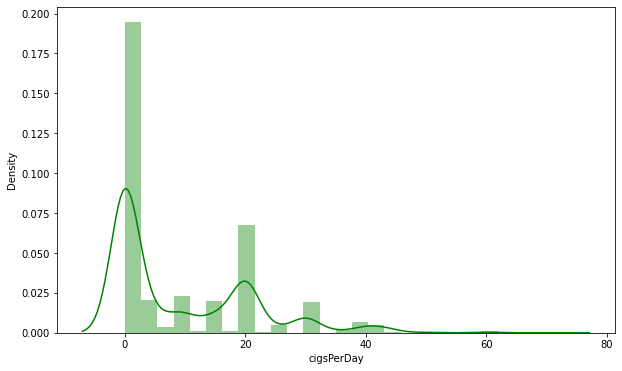

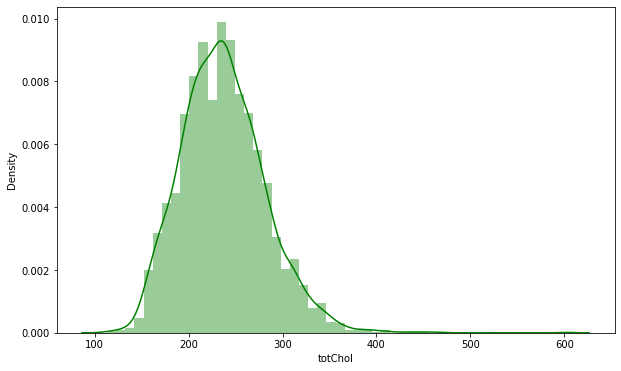

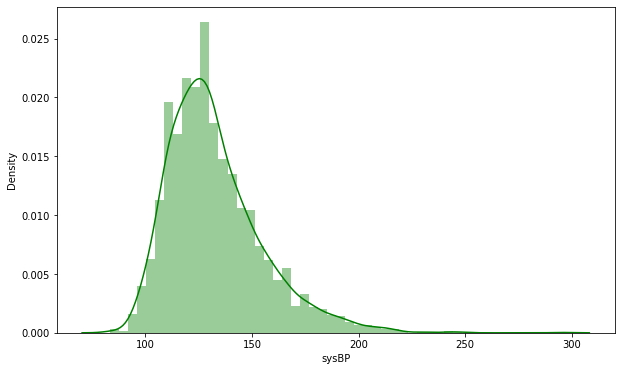

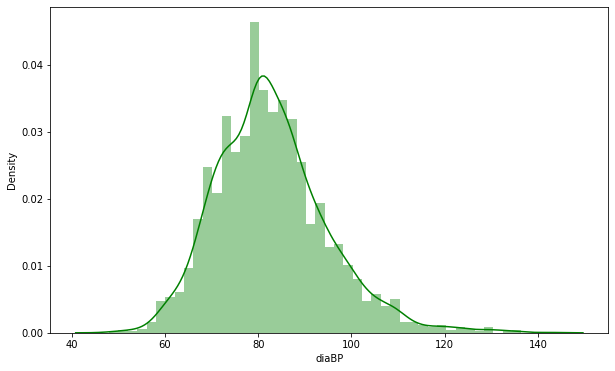

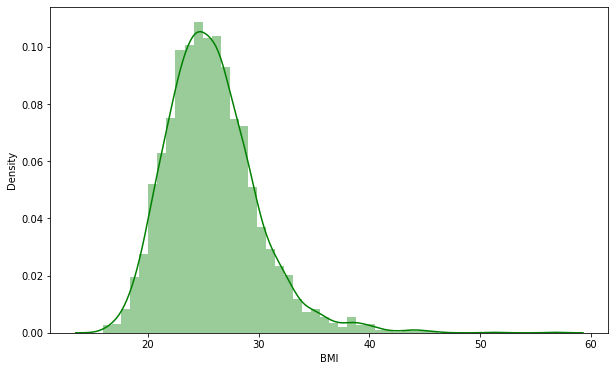

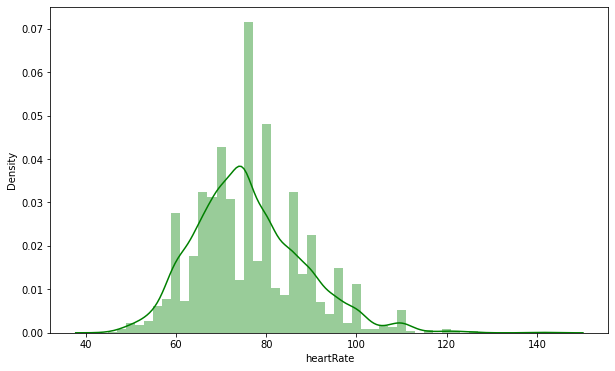

In [ ]:
#assign the numerical coulmn to variavle
columns=list(['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate'])
features=pd.Index(columns)
#analyz and distribution of all numerical features
for col in features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col] ,color="g")
  plt.xlabel(col)
plt.show()

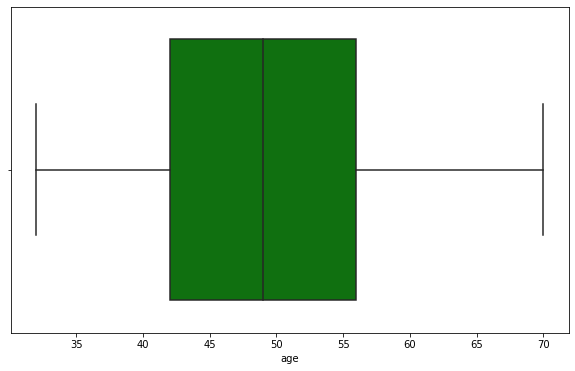

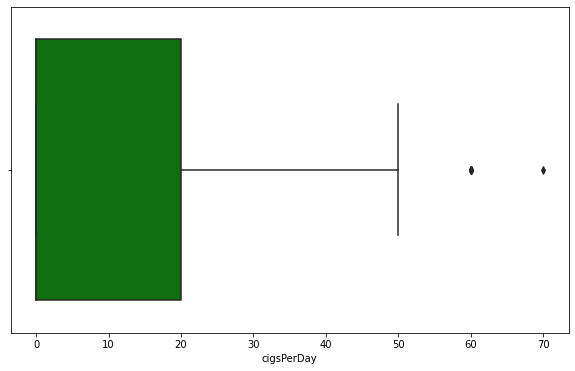

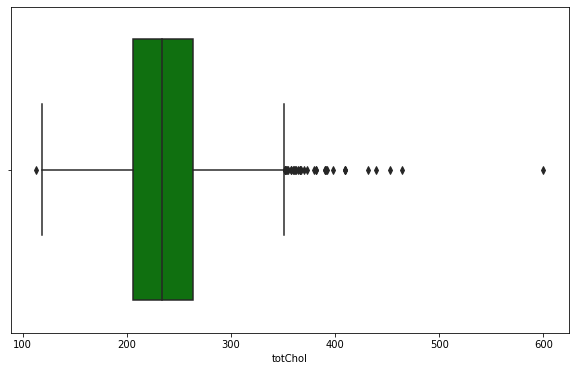

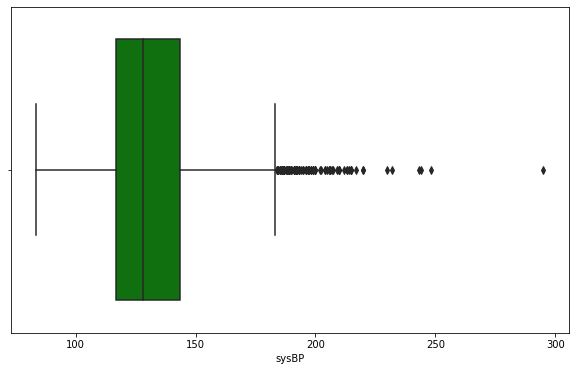

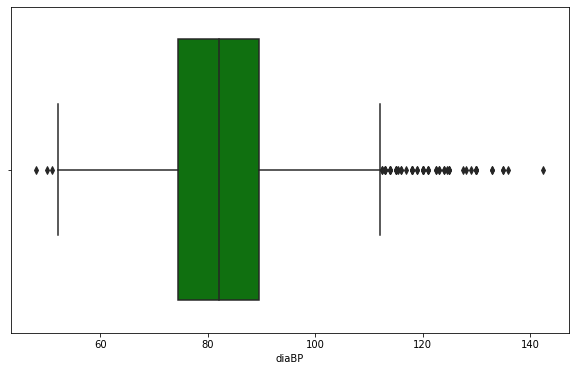

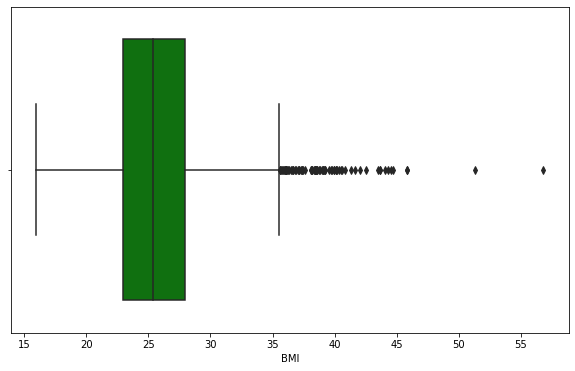

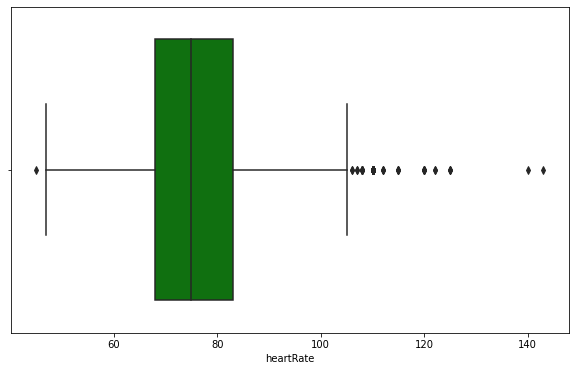

In [ ]:
#Ploting box plot for age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate columns
for col in features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[col] ,color="g")
  plt.xlabel(col)
plt.show()

In [ ]:
#capping outliers to upper and lower limit
df.loc[df.cigsPerDay > 50,'cigsPerDay']=50
df.loc[df.totChol > 350,'totChol']=350
df.loc[df.sysBP > 180,'sysBP']=180
df.loc[df.diaBP > 110,'diaBP']=110
df.loc[df.diaBP < 50,'diaBP']=50
df.loc[df.BMI > 35,'BMI']=35
df.loc[df.heartRate > 105,'heartRate']=105
df.loc[df.heartRate < 55,'heartRate']=55

## **Exploratory Analysis**

---









### **Analysis of Dependent Variable:-**

<b> What is a dependent variable in data analysis?</b>

* we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.


In [ ]:
# counting the TenYearCHD variable data set
df['TenYearCHD'].value_counts()

0    2714
1     475
Name: TenYearCHD, dtype: int64

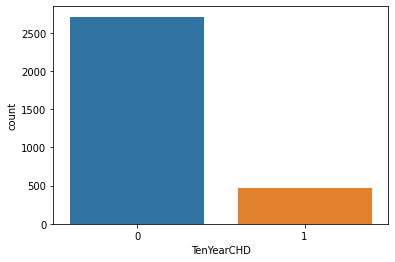

In [ ]:
# checking the count distribution of TenYearCHD Variable
sns.countplot(x ='TenYearCHD', data = df)

From the above bar graph we can say that

0 - for The Person who is not showing  cardiovascular risk

1 - for The Person who is showing  cardiovascular risk


<b>Persons showing risk are less than the Persons not showing risk  in the given dataset</b>.As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.

## **Analysis of Independent Variables:-**

### **Categorical Features :-**





We have few categorical features in our dataset that are


* age

* education

* sex

* is_smoking

* BPMeds

* prevalentStroke

* prevalentHyp

* diabetes

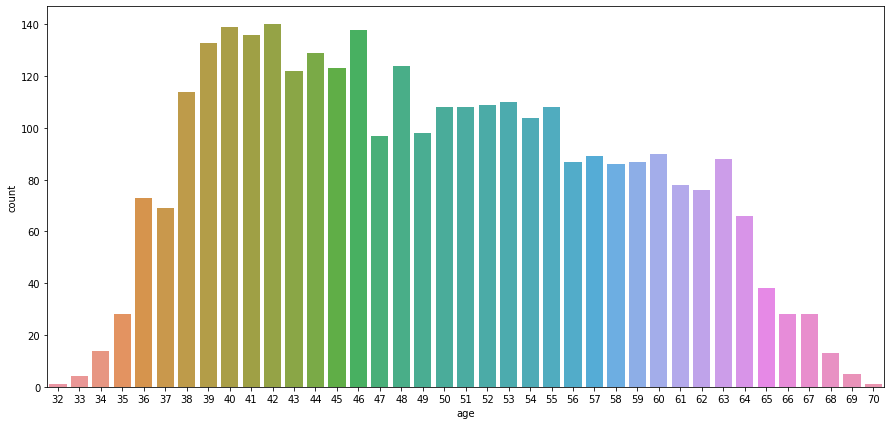

In [ ]:
#plotting the count plot for age distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'age', data = df)
plt.show()

**From the above bar graph we can say that most of people belongs age 38-64**

#### **Feature Education**

In [ ]:
# counts the education variable data set
df['education'].value_counts()

1.0    1338
2.0     960
3.0     531
4.0     360
Name: education, dtype: int64

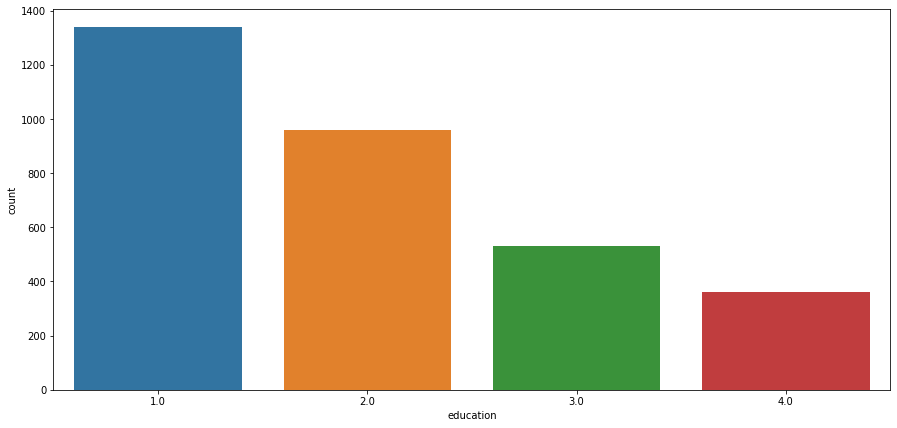

In [ ]:
#plotting the count plot education
plt.figure(figsize=(15,7))
sns.countplot(x = 'education', data = df)
plt.show()

#### **Feature sex**

In [ ]:
# counts the sex variable data set
df['sex'].value_counts()

F    1796
M    1393
Name: sex, dtype: int64

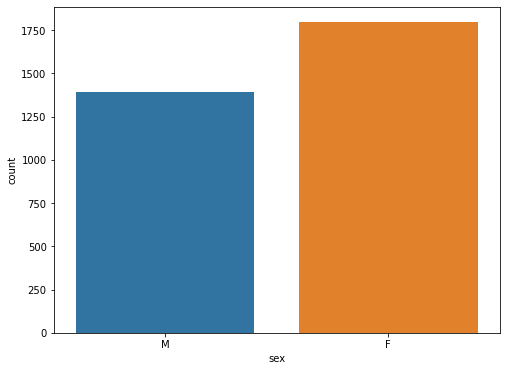

In [ ]:
# ploating  the distribution of sex Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='sex', data = df)  

Graph consist of

* M-Male

* F-female

**Above graph shows number of females is more than number of male**

#### **Feature is_smoking**

In [ ]:
# counts the is_smoking variable data set
df['is_smoking'].value_counts()

NO     1610
YES    1579
Name: is_smoking, dtype: int64

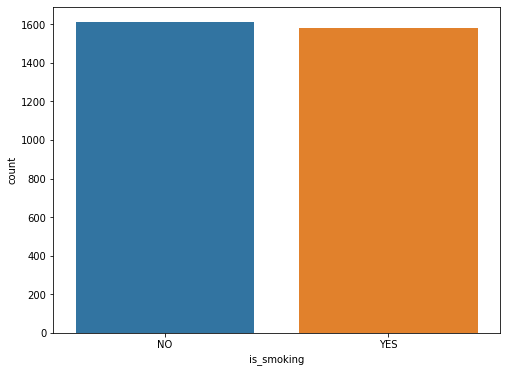

In [ ]:
# checking the distribution of is_smoking Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='is_smoking', data = df)

Bar graph shows

* NO-For person who dont smoke

* YES-For person who smoke

**we can conclude that people prefers smoking and people avoide smokeing are appriximately same in dataset**

#### **Feature BPMeds**

In [ ]:
# counts the BPMeds variable data set
df['BPMeds'].value_counts()

0.0    3095
1.0      94
Name: BPMeds, dtype: int64

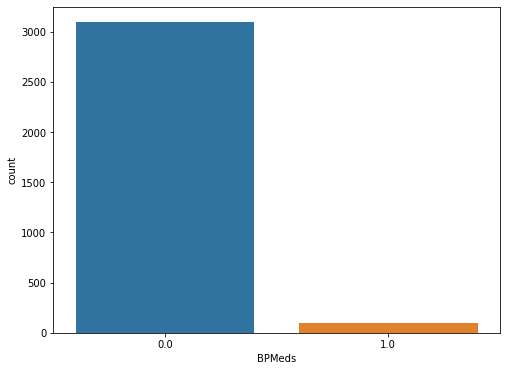

In [ ]:
# checking the distribution of male & female Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='BPMeds', data = df)

Bar graph shows

* 0.0 - For person who doesnt takes BP medcine

* 1.0 - For person who takes BP medcine

**here we can see that there are only 88 persons who take BP medcine**

#### **Feature prevalentStroke**

In [ ]:
# counts the prevalentStroke variable data set
df['prevalentStroke'].value_counts()

0    3170
1      19
Name: prevalentStroke, dtype: int64

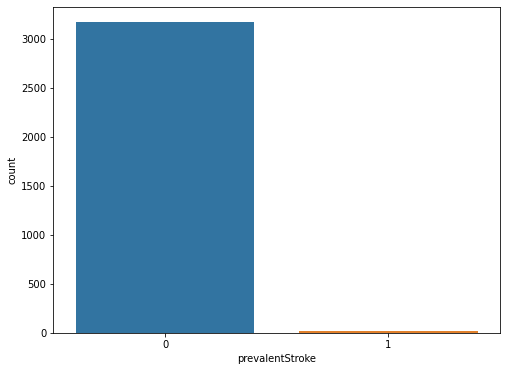

In [ ]:

# checking the distribution of male & female Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='prevalentStroke', data = df)

Bar graph shows

* 0 - For person who is not patient of prevalentstoke

* 1 - For person who is patient of prevalentstoke

**here we can see that there are only 18 persons who are patients of prevalentstoke. which are few as compare to data we will drop column after EDA**

#### **Feature prevalentHyp**

In [ ]:
# counts the prevalentHyp variable data set
df['prevalentHyp'].value_counts()

0    2190
1     999
Name: prevalentHyp, dtype: int64

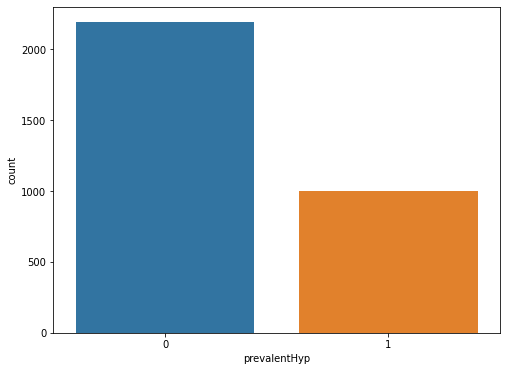

In [ ]:
# checking the distribution of prevalentHyp Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='prevalentHyp', data = df)

Bar graph shows

* 0 - For person who is not patient of prevalentHyp

* 1 - For person who is patient of prevalentHyp

**we can see that persons who are patients of prevalentHyp are approx half of persons who are not patients of prevalentHyp**

#### **Feature diabetes**

In [ ]:
# counts the diabetes variable data set
df['diabetes'].value_counts()

0    3108
1      81
Name: diabetes, dtype: int64

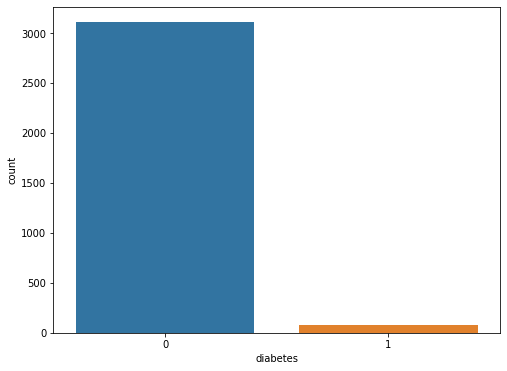

In [ ]:
# checking the distribution of diabetes Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='diabetes', data = df)

Bar graph shows

0 - For person who is not patient of diabetes

1 - For person who is patient of diabetes

**From the above bar plot we can conclude that very few people showing diabetes**

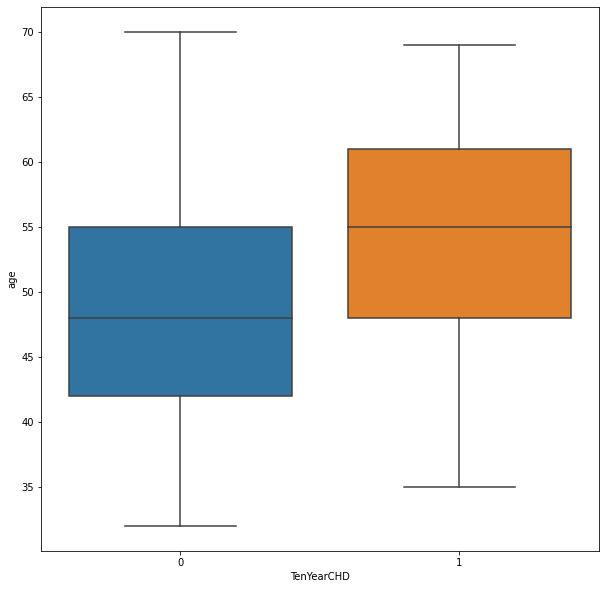

In [ ]:
#plotting the box plot to vizualize the TenYearCHD distribution for age 
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="TenYearCHD", y="age", data=df)

**From the above box plot we can conclude that  most people showing cardiovasculat risk belongs age 48-62**

### **Numerical features**

---




In [ ]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
1             1         0    212.0  168.0   98.0  29.77       72.0   
2             0         0    250.0  116.0   71.0  20.35       88.0   
3             1         0    233.0  158.0   88.0  28.26       68.0   
4             0         0    241.0  136.5   85.0  26.42       70.0   
5             1         0    272.0  180.0  110.0  32.80       85.0   

   TenYearCHD  glucose_median  
1           0            75.0  
2           0            94.0  
3           1            94.0  
4           0            77.0  
5           1            65.0

We have few categorical features in our dataset that are

* cigsPerDay

* totChol	

* sysBP

* diaBP	
  
* BMI

* heartRate	
    
* glucose

#### **Feature cigsPerDay**

In [ ]:
# counts of cigsPerDay
df['cigsPerDay'].value_counts()

0.0     1610
20.0     578
30.0     168
15.0     166
10.0     101
5.0       99
9.0       95
3.0       72
40.0      57
1.0       46
25.0      41
43.0      41
35.0      17
2.0       15
50.0      13
6.0       13
8.0        9
7.0        8
18.0       6
4.0        6
23.0       5
17.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
38.0       1
Name: cigsPerDay, dtype: int64

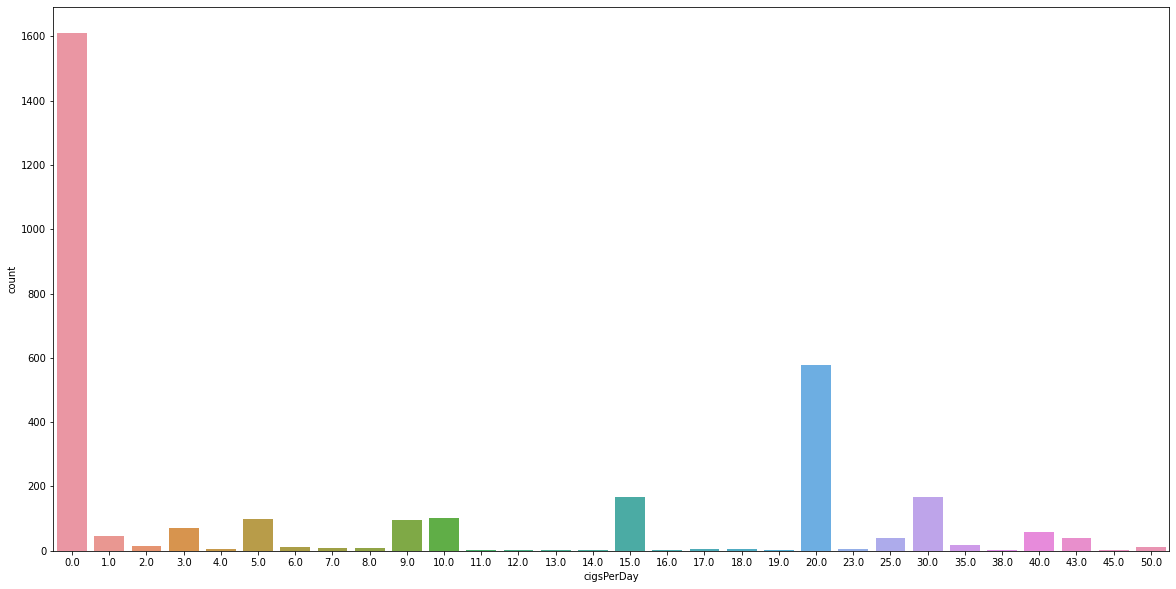

In [ ]:
# checking the distribution of cigsPerDay
plt.figure(figsize=(20,10))
sns.countplot(x ='cigsPerDay', data = df)

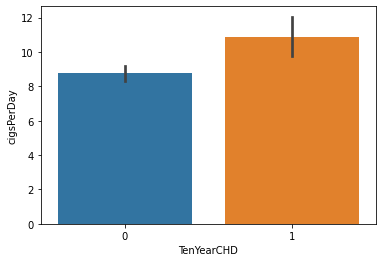

In [ ]:
#plotting the bar plot to vizualize the data distribution of TenYearCHD and cigsPerDay
sns.barplot(x='TenYearCHD', y='cigsPerDay', data=df)			

Above Bar graph shows

* 0 - For person who is not showing cardiovascular risk

* 1 - For person who is showing cardiovascular risk

**From the above bar plot we can conclude that person who is showing cardiovascular risk prefers more cigrates in a day**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

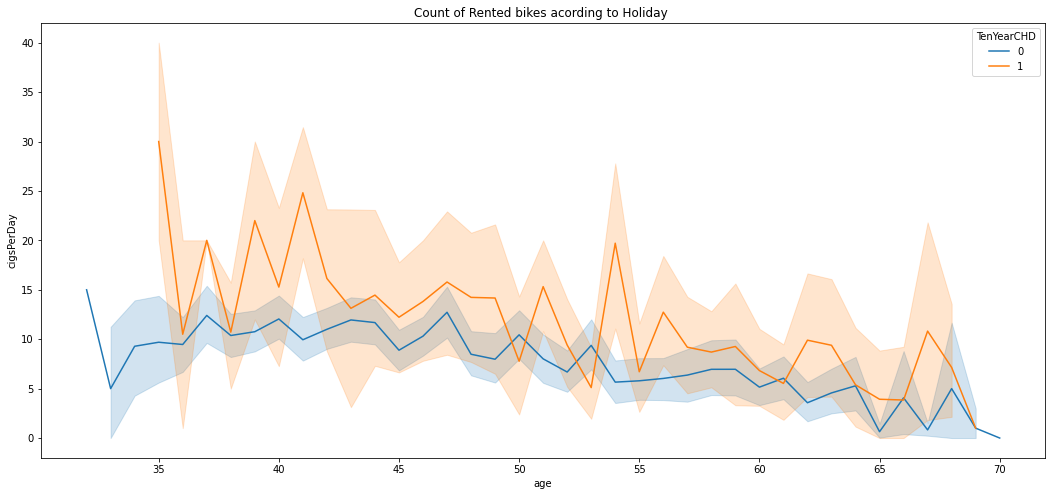

In [ ]:
#plotting line plot for understanding distribution TenYearCHD over age and cigsPerDay
fig,ax=plt.subplots(figsize=(18,8))
sns.lineplot(data=df,x='age',y='cigsPerDay',hue='TenYearCHD',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

**From above graph we can say that as age and cigsperday are decresing risk of cardiovascular also decreasing**

#### **Feature sysBP**

In [ ]:
# counts of sysBP
df['sysBP'].value_counts()

180.0    127
130.0     81
110.0     80
120.0     79
125.0     65
        ... 
95.5       1
175.5      1
169.5      1
99.5       1
85.5       1
Name: sysBP, Length: 172, dtype: int64

In [ ]:
# checking the distribution of sysBP
plt.figure(figsize=(200,100))
sns.countplot(x ='sysBP', data = df)

**for better visualisation double click on graph**

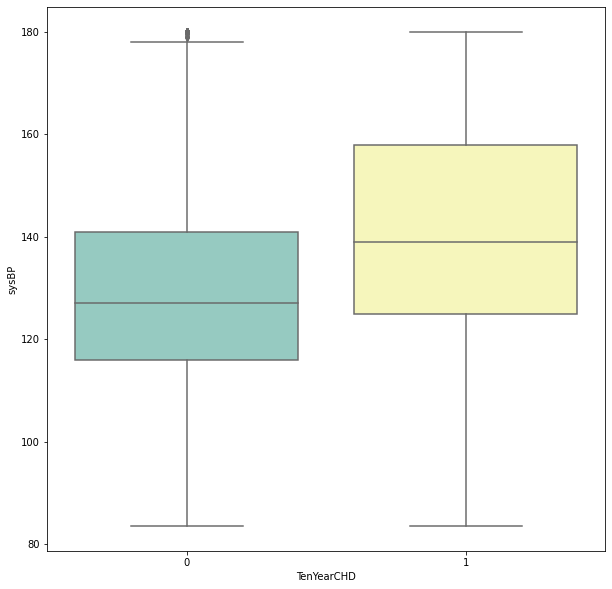

In [ ]:
#plotting the box plot to vizualize the data distribution of TenYearCHD and sysBP
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="TenYearCHD", y="sysBP", data=df,palette="Set3")

**From the above box plot it is clear that peoples showing cardiovascular risk also showing sysBP appro 120-160**

#### **Feature diaBP**

In [ ]:
# counts of diaBPdiaBP
df['diaBP'].value_counts()

80.0     199
82.0     120
70.0     103
85.0     100
90.0      94
        ... 
108.5      1
57.5       1
109.5      1
105.5      1
51.0       1
Name: diaBP, Length: 113, dtype: int64

In [ ]:
# checking the distribution of diaBP
plt.figure(figsize=(200,100))
sns.countplot(x ='diaBP', data = df)

**for better visualisation double click on graph**

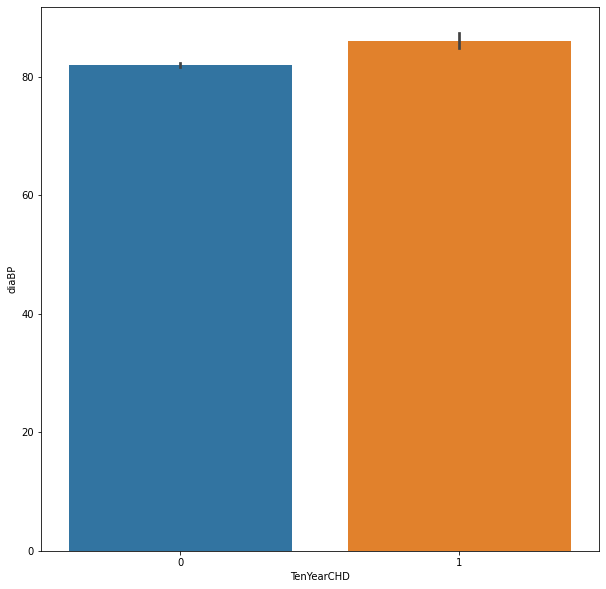

In [ ]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.barplot(x="TenYearCHD", y="diaBP", data=df)

<Figure size 432x432 with 0 Axes>

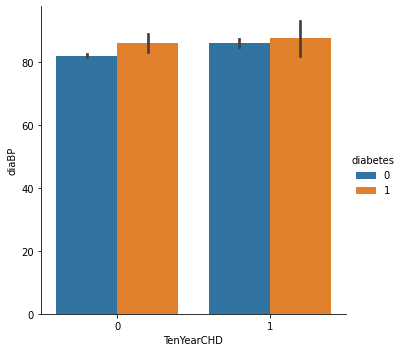

In [ ]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(6,6))
sns.catplot(x="TenYearCHD", y="diaBP",
                hue="diabetes",
                data=df, kind="bar")

#### **Feature BMI**

In [ ]:
# counts of BMI
df['BMI'].value_counts()

35.00    91
22.91    17
22.54    16
22.19    15
23.48    12
         ..
33.17     1
27.66     1
31.47     1
31.38     1
31.09     1
Name: BMI, Length: 1148, dtype: int64

In [ ]:
# checking the distribution of BMI
plt.figure(figsize=(200,100))
sns.countplot(x ='BMI', data = df)

**for better visualisation double click on graph**

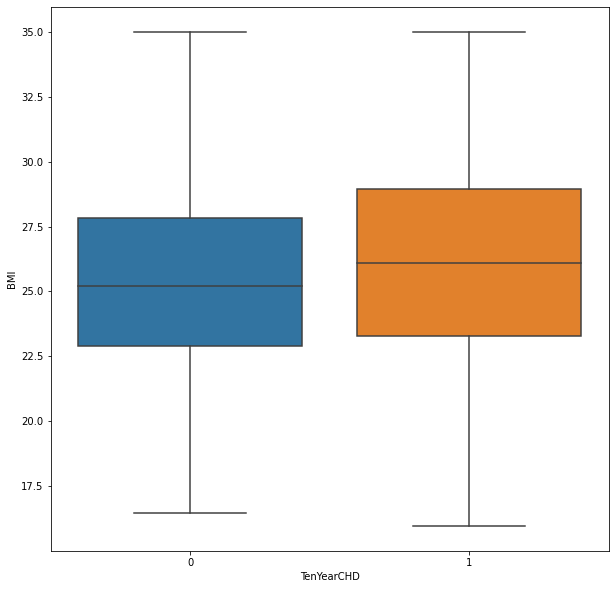

In [ ]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="TenYearCHD", y="BMI", data=df)

From the above data analysis we can say that

* **BMI(Body Mass Index)of most of people is between approx 20-30**

#### **Feature heartrate**

In [ ]:
# counts of heartRate
df['heartRate'].value_counts()

75.0     418
80.0     278
70.0     232
85.0     177
72.0     173
60.0     173
65.0     142
90.0     136
68.0     124
67.0      75
55.0      74
63.0      74
100.0     72
105.0     71
78.0      67
66.0      64
95.0      62
88.0      59
82.0      58
73.0      52
62.0      42
69.0      41
64.0      39
77.0      39
76.0      38
92.0      38
58.0      37
83.0      36
96.0      33
86.0      29
79.0      28
87.0      27
74.0      25
71.0      24
84.0      20
94.0      19
56.0      16
98.0      13
57.0      13
93.0       8
81.0       8
89.0       8
91.0       7
102.0      6
61.0       5
103.0      3
59.0       3
104.0      2
97.0       1
Name: heartRate, dtype: int64

In [ ]:
# checking the distribution of heartRate
plt.figure(figsize=(200,100))
sns.countplot(x ='heartRate', data = df)

**for better visualisation double click on graph**

<Figure size 720x720 with 0 Axes>

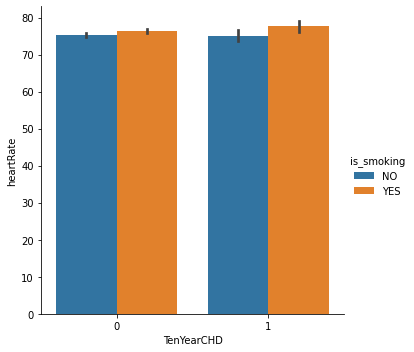

In [ ]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
sns.catplot(x="TenYearCHD", y="heartRate",
                hue="is_smoking",
                data=df, kind="bar")

From the above data analysis we can say that

* **As we can see heartrate most of people is between approx 65-110**
* **heartrate of smokers shows more than non smoker**s 

#### **Feature Glucose**

In [ ]:
# counts of sysBP
df['glucose_median'].value_counts()

78.0     372
75.0     140
83.0     129
70.0     122
77.0     121
        ... 
235.0      1
40.0       1
191.0      1
119.0      1
274.0      1
Name: glucose_median, Length: 127, dtype: int64

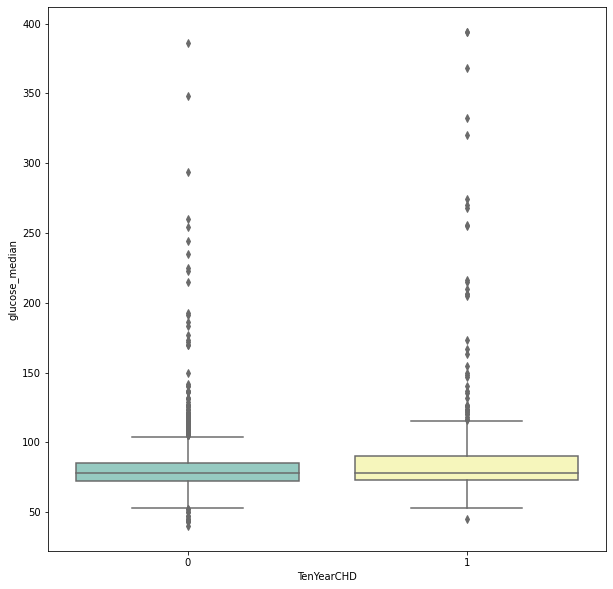

In [ ]:
#plotting the box plot to vizualize the data distribution of TenYearCHD over glucose
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="TenYearCHD", y="glucose_median", data=df,palette="Set3")

From the above data analysis we can say that

* **As we can see glucose level of most of people is between 70-100**

In [ ]:
#columns=['age','totChol','sysBP','diaBP','heartRate','BMI','glucose_median','cigsPerDay']					
#sns.pairplot(data =df[columns])

**Fron above pair plot:-**

* **sysBP**

* **diaBP**

**coloumns are positevly corelated to each other Droping one of them will surely lead to good accuracy**

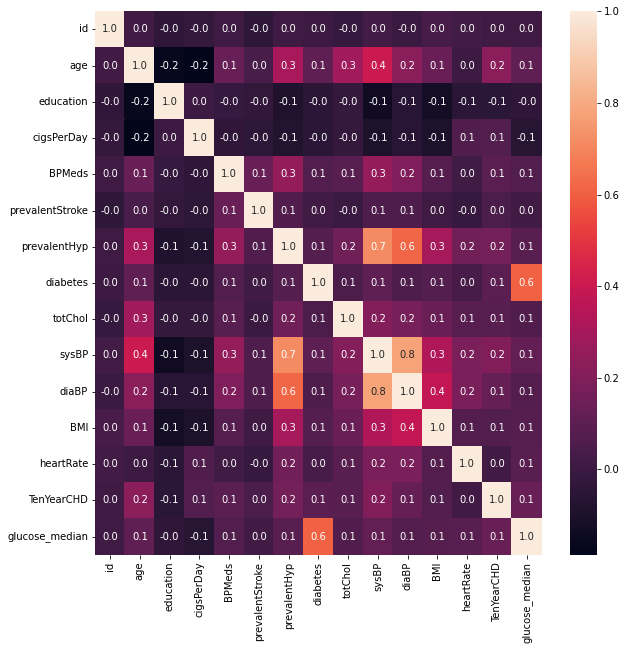

In [ ]:
# ploting heatmap for correlation between features
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

**Result shows:-**
* **id**
* **eductaion**

**coloumns are not correlated to the other featutres. droping them will surely lead to a better accuracy.**

In [ ]:
#droping columns id , education,diaBP & prevalentStroke
df.drop(columns=['id','education','prevalentStroke','diaBP'],inplace=True)

In [ ]:
# print last 5 rows of the dataset
df.head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentHyp  diabetes  totChol  \
1   36   M         NO         0.0     0.0             1         0    212.0   
2   46   F        YES        10.0     0.0             0         0    250.0   
3   50   M        YES        20.0     0.0             1         0    233.0   
4   64   F        YES        30.0     0.0             0         0    241.0   
5   61   F         NO         0.0     0.0             1         0    272.0   

   sysBP    BMI  heartRate  TenYearCHD  glucose_median  
1  168.0  29.77       72.0           0            75.0  
2  116.0  20.35       88.0           0            94.0  
3  158.0  28.26       68.0           1            94.0  
4  136.5  26.42       70.0           0            77.0  
5  180.0  32.80       85.0           1            65.0

In [ ]:
#resetting index for avoiding miss order of the rows
df=df.reset_index()

In [ ]:
# print last 5 rows of the dataset
df.head()

index  age sex is_smoking  cigsPerDay  BPMeds  prevalentHyp  diabetes  \
0      1   36   M         NO         0.0     0.0             1         0   
1      2   46   F        YES        10.0     0.0             0         0   
2      3   50   M        YES        20.0     0.0             1         0   
3      4   64   F        YES        30.0     0.0             0         0   
4      5   61   F         NO         0.0     0.0             1         0   

   totChol  sysBP    BMI  heartRate  TenYearCHD  glucose_median  
0    212.0  168.0  29.77       72.0           0            75.0  
1    250.0  116.0  20.35       88.0           0            94.0  
2    233.0  158.0  28.26       68.0           1            94.0  
3    241.0  136.5  26.42       70.0           0            77.0  
4    272.0  180.0  32.80       85.0           1            65.0

In [ ]:
# checking the distribution of all the Variables
df.apply(lambda x: len(x.unique()))

index             3189
age                 39
sex                  2
is_smoking           2
cigsPerDay          30
BPMeds               2
prevalentHyp         2
diabetes             2
totChol            208
sysBP              172
BMI               1148
heartRate           49
TenYearCHD           2
glucose_median     127
dtype: int64

In [ ]:
#assigninig values 'male' as 1 & 'female as 0
df['sex'] = df['sex'].apply(lambda x:1 if 'M' in x else 0)
#assigninig values if person smokes 'YES' as 1 & if dont 'NO 'as 0
df['is_smoking'] = df['is_smoking'].apply(lambda x:1 if 'YES' in x else 0)

In [ ]:
# print last 5 rows of the dataset
df.head()

index  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentHyp  diabetes  \
0      1   36    1           0         0.0     0.0             1         0   
1      2   46    0           1        10.0     0.0             0         0   
2      3   50    1           1        20.0     0.0             1         0   
3      4   64    0           1        30.0     0.0             0         0   
4      5   61    0           0         0.0     0.0             1         0   

   totChol  sysBP    BMI  heartRate  TenYearCHD  glucose_median  
0    212.0  168.0  29.77       72.0           0            75.0  
1    250.0  116.0  20.35       88.0           0            94.0  
2    233.0  158.0  28.26       68.0           1            94.0  
3    241.0  136.5  26.42       70.0           0            77.0  
4    272.0  180.0  32.80       85.0           1            65.0

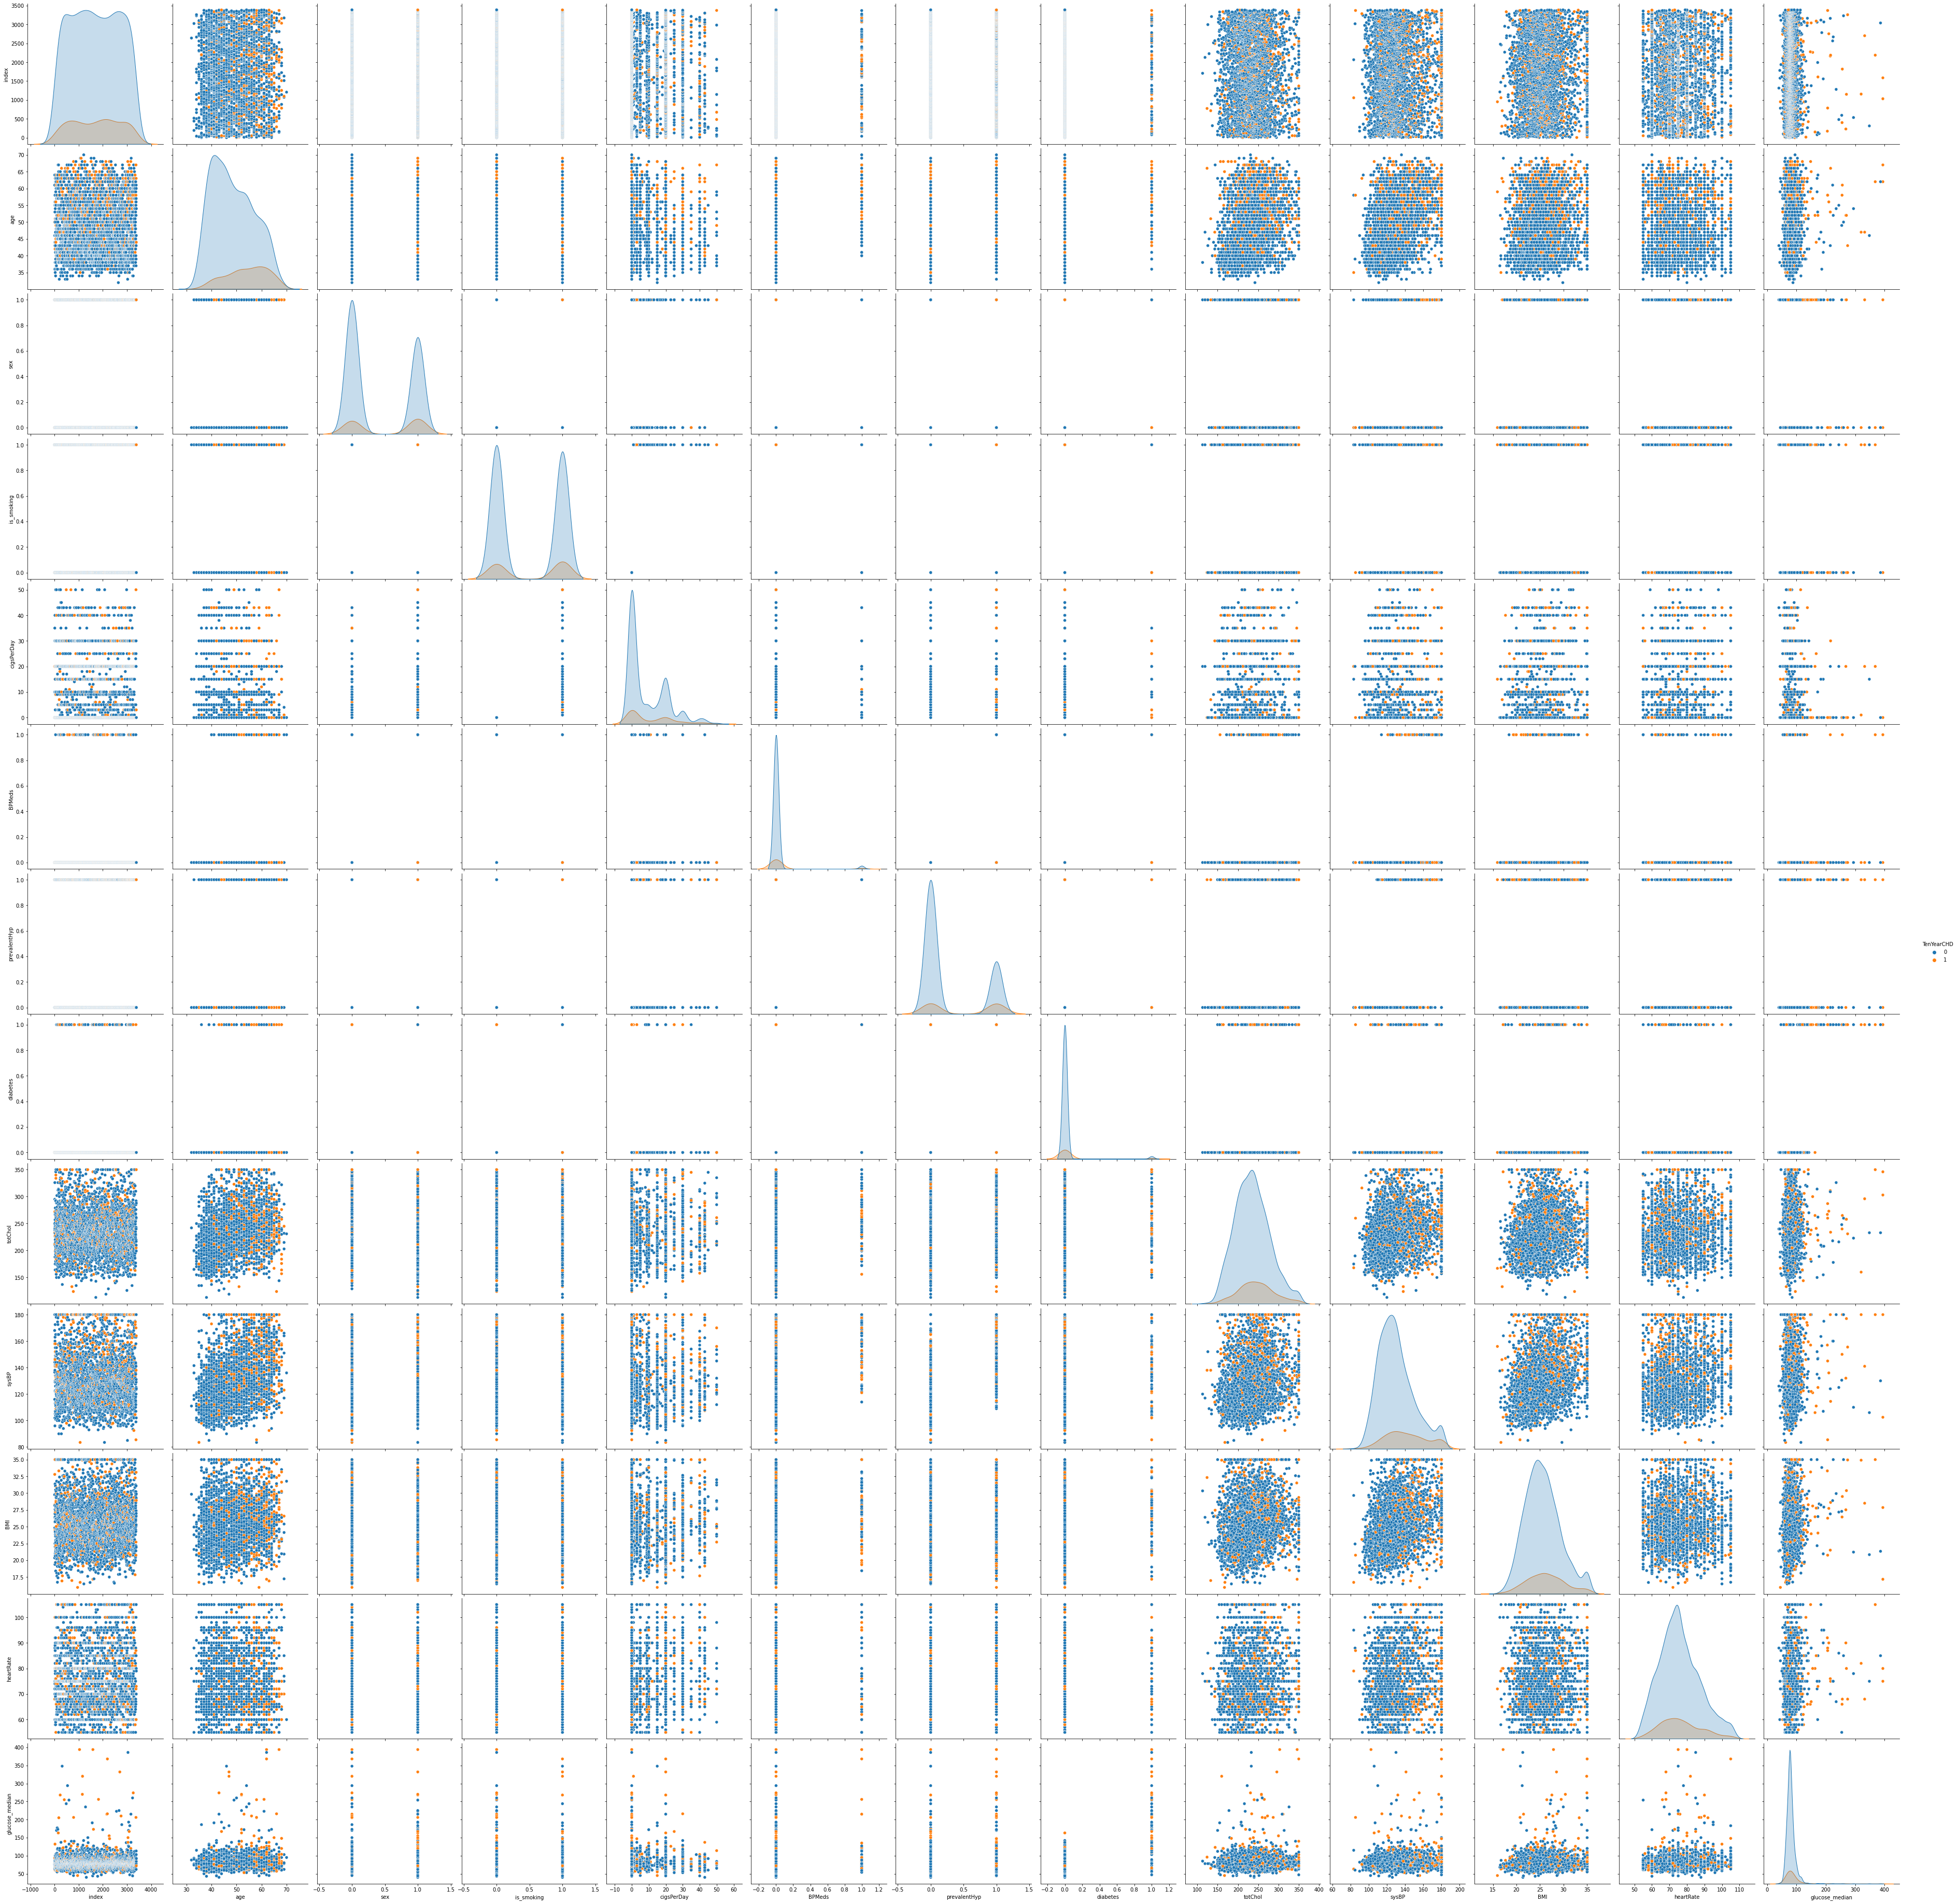

In [ ]:
#plotting pairplot for uderstanding distribution of the variables
sns.pairplot(df, hue="TenYearCHD",height=4)

As you can see that lot of overlapping of points in the  distribution and logistic regression classifies the data into two division. here which will surely not gone give us good accuracy.then we will go with other classification algorithms

### **OneHotEncoding :**

* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

* **here we going to perform one hot encoding on columns sex, is_smoking, BPMeds, prevalentHyp, diabetes.**

In [ ]:
#creating dummie variables 
dataset = pd.get_dummies(df, columns = ['sex', 'is_smoking', 'BPMeds', 'prevalentHyp', 'diabetes'])

In [ ]:
# print last 5 rows of the dataset
dataset.head()

index  age  cigsPerDay  totChol  sysBP    BMI  heartRate  TenYearCHD  \
0      1   36         0.0    212.0  168.0  29.77       72.0           0   
1      2   46        10.0    250.0  116.0  20.35       88.0           0   
2      3   50        20.0    233.0  158.0  28.26       68.0           1   
3      4   64        30.0    241.0  136.5  26.42       70.0           0   
4      5   61         0.0    272.0  180.0  32.80       85.0           1   

   glucose_median  sex_0  sex_1  is_smoking_0  is_smoking_1  BPMeds_0.0  \
0            75.0      0      1             1             0           1   
1            94.0      1      0             0             1           1   
2            94.0      0      1             0             1           1   
3            77.0      1      0             0             1           1   
4            65.0      1      0             1             0           1   

   BPMeds_1.0  prevalentHyp_0  prevalentHyp_1  diabetes_0  diabetes_1  
0           0               0               1           1           0  
1           0               1               0           1           0  
2           0               0               1           1           0  
3           0               1               0           1           0  
4           0               0               1           1           0

**Splitting the Features and Target**

In [ ]:
#droping unusefull column index
dataset.drop(columns=['index'],inplace=True)

In [ ]:
#divideing data into dependent(y) and independent(X) variables
y = dataset['TenYearCHD']
X = dataset.drop(['TenYearCHD'], axis = 1)

In [ ]:
#asigning X columns to col for further uses
col= X.columns
print(col)

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate',
       'glucose_median', 'sex_0', 'sex_1', 'is_smoking_0', 'is_smoking_1',
       'BPMeds_0.0', 'BPMeds_1.0', 'prevalentHyp_0', 'prevalentHyp_1',
       'diabetes_0', 'diabetes_1'],
      dtype='object')


## **SMOTE**
In our data set we have Imbalanced Data Distribution in our dependent variable, it generally happens when observations in one of the class are much higher i.e not defaulter or lower than the other classes i.e defaulter.

As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.

**SMOTE**

**SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.**

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss


In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)


In [ ]:
X,y=smk.fit_resample(X,y)
print(X.shape,y.shape)


(5368, 17) (5368,)


In [ ]:
from collections import Counter
print('Resampled dataset shape {}'.format(Counter(y)))

Resampled dataset shape Counter({0: 2684, 1: 2684})


## **Scaling down the values**

In [ ]:
#standardise the x value by using satandardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Splitting the Data into Training data & Test Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5)

In [ ]:
#cheaking shape of X_train,X_test
X.shape,X_train.shape,X_test.shape

((5368, 17), (4294, 17), (1074, 17))

In [ ]:
 #cheaking shape of y_train,y_test
 y.shape,y_train.shape,y_test.shape

((5368,), (4294,), (1074,))

***Model Training ***

---



## **KNNeighborsClassifier**

The K-Nearest Neighbors algorithm is a supervised machine learning algorithm for labeling an unknown data point given existing labeled data.The nearness of points is typically determined by using distance algorithms such as the Euclidean distance ,Manhattan Distance formula based on parameters of the data.

**Euclidean Distance** is the most commonly used distance formula. To find the Euclidean distance between two points, we first calculate the squared distance between each dimension. If we add up all of these squared differences and take the square root, we’ve computed the Euclidean distance.

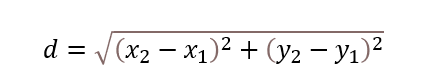

**Manhattan Distance** is extremely similar to Euclidean distance. Rather than summing the squared difference between each dimension, we instead sum the absolute value of the difference between each dimension. It’s called Manhattan distance
​

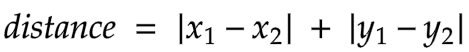

K-nearest neighbors select the K number of points which is closet to the test data. The KNN algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data and class holds the highest probability will be selected.

resource:-https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4


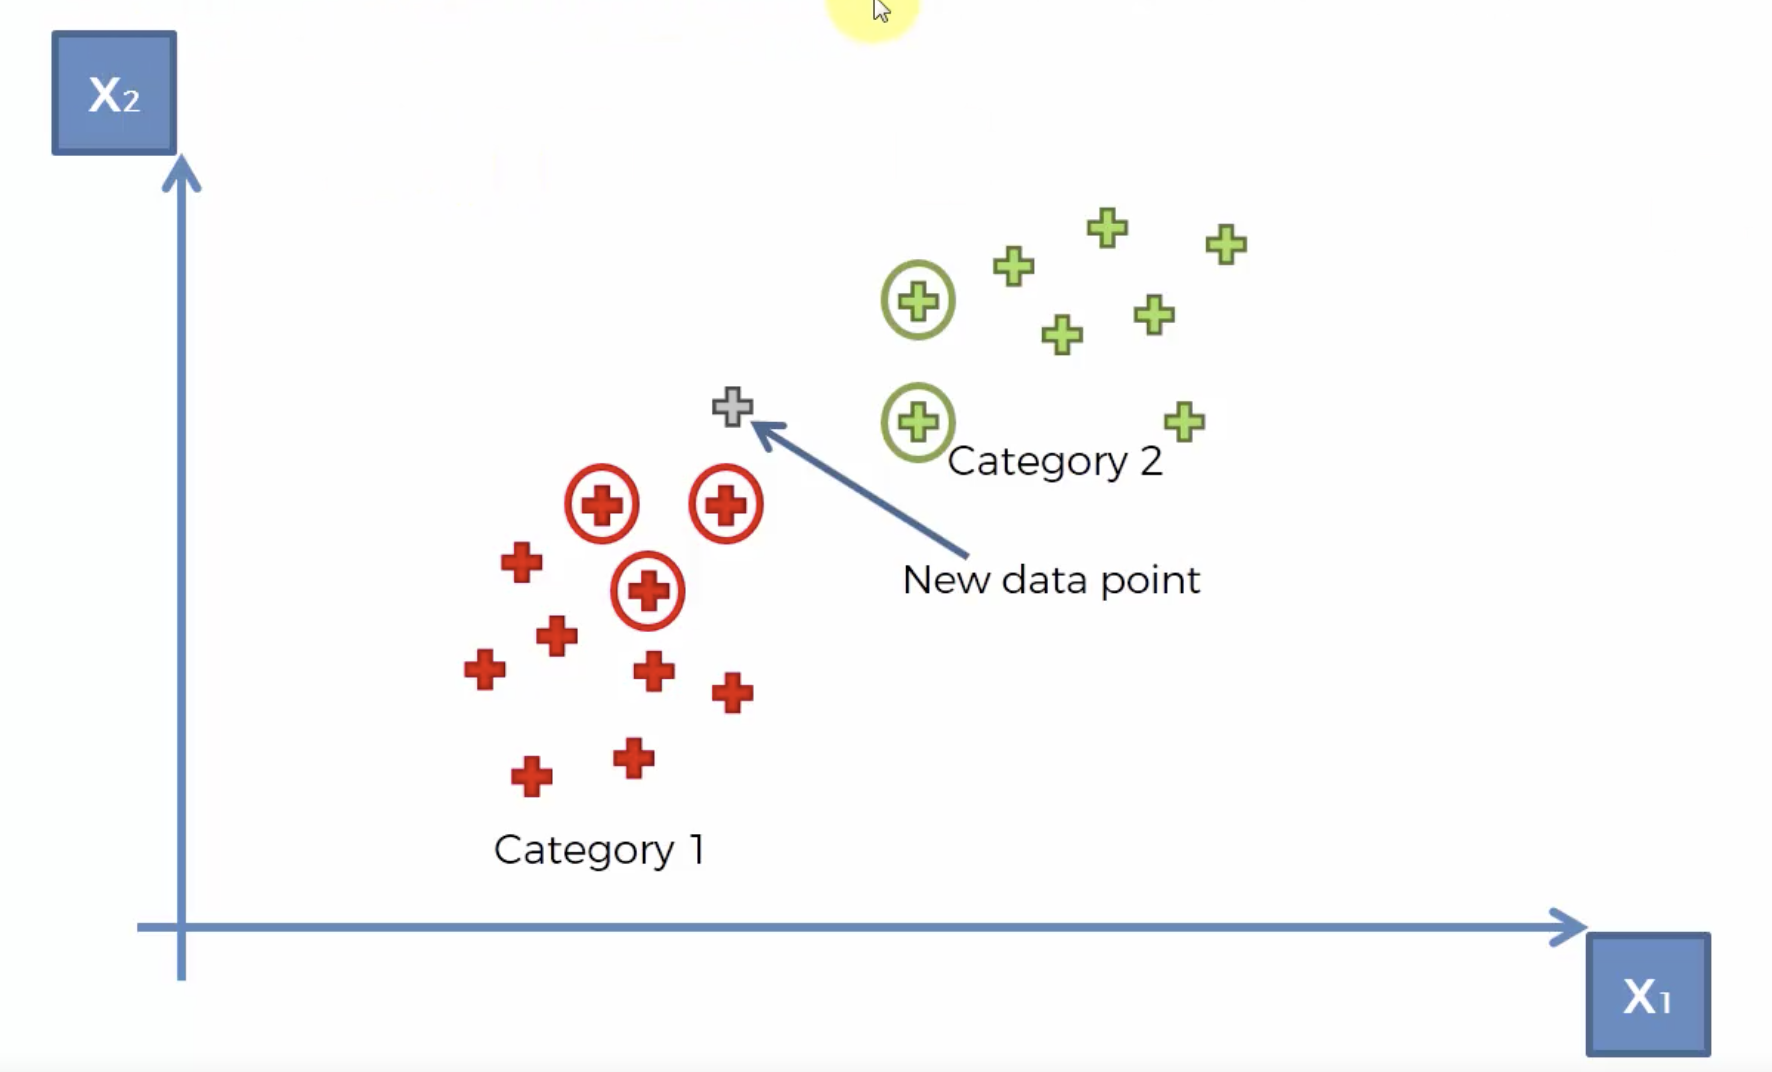

In [ ]:
# importing KNeighborsClassifier and cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

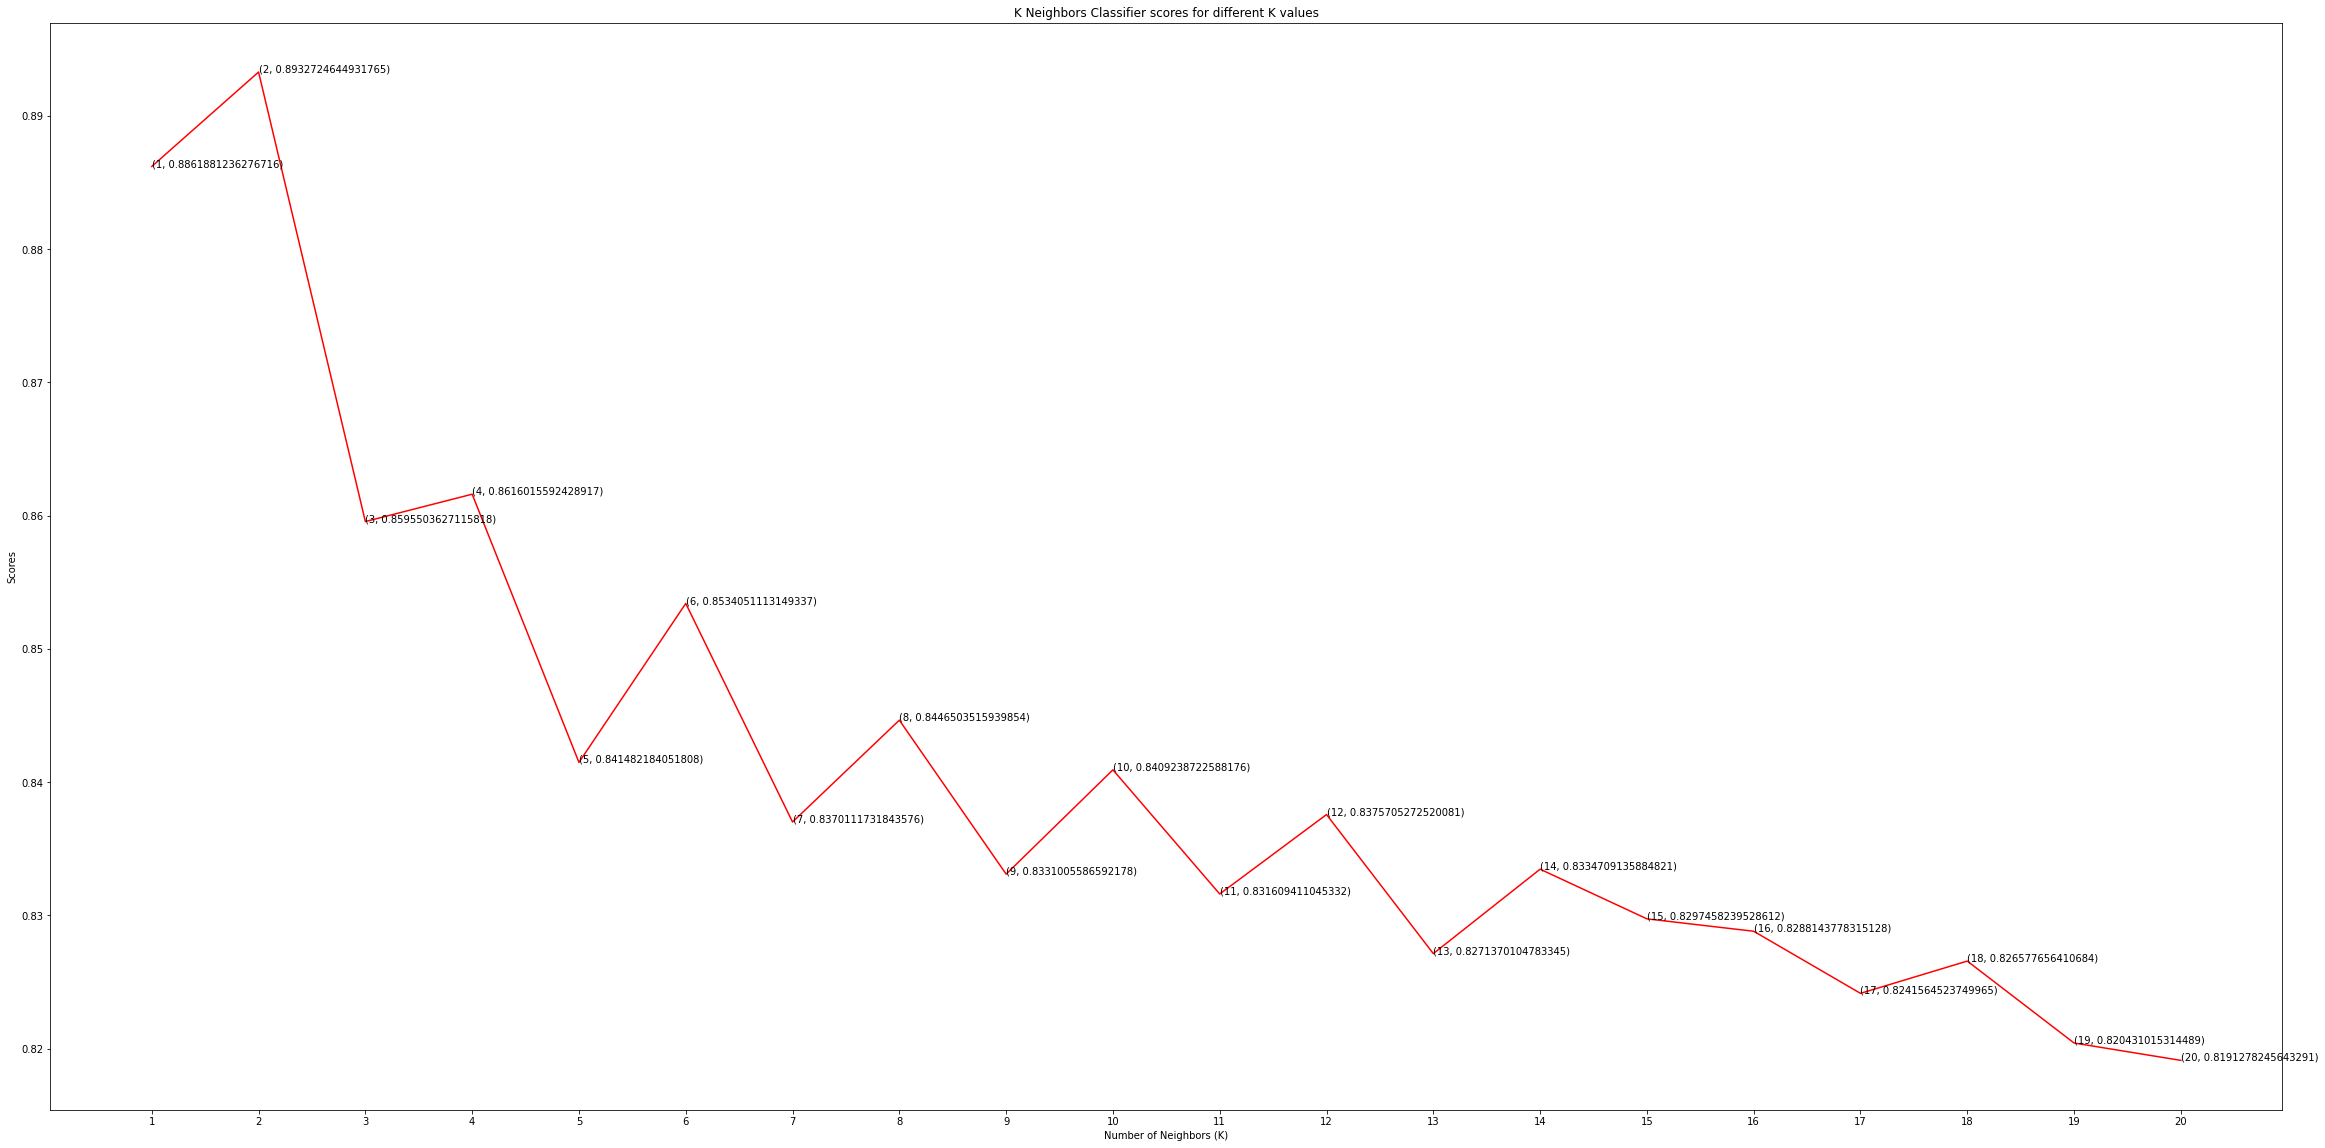

In [ ]:
#plotting point graph for KNeighbors Classifier scores for different K values
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)    
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


**From the above point Graph  we can conclude that if KNN score is 8,10,12 it will surely lead to good accuracy.**

## **What is GridSearchCV?**

GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit our estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [ ]:
#importing required packages
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV


In [ ]:
# defining parameter range and setting up the model
k_range = list(range(1,2))
param_grid = dict(n_neighbors=k_range)
KNN_clf = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [ ]:
# fitting the model for grid search
KNN_clf.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1]}, scoring='accuracy', verbose=1)

In [ ]:
# calculating best score for classifier 
KNN_clf.best_score_

0.8702845991218083

In [ ]:
#signing classifier best estimators to optimal_KNN_clf
optimal_KNN_clf = KNN_clf.best_estimator_

In [ ]:
#printing y_pred
y_pred_Test_KNN=optimal_KNN_clf.predict(X_test)

In [ ]:
#signing Model Accuracy to the Accuracy_score
Accuracy_score=metrics.accuracy_score(y_test, y_pred_Test_KNN)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",Accuracy_score)

Accuracy: 0.8845437616387337


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'KNeighbors classifier',
       'Accuracy':round((Accuracy_score),3)}
training_df=pd.DataFrame(dict1,index=[1])

### **Confusion Matrix**
Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

In [ ]:
#forming confusion matrix for Y_test and y_pred
KNN_cm=confusion_matrix(y_test,y_pred_Test_KNN)
KNN_cm

array([[450,  87],
       [ 37, 500]])

In [ ]:
# Predicted Probability for X_test
y_preds_proba_KNN = optimal_KNN_clf.predict_proba(X_test)[::,1]
test_class_preds_KNN = optimal_KNN_clf.predict(X_test)


In [ ]:
#print the accuracy,precission,recall,f1,roc_score 
test_accuracy_KNN = accuracy_score(test_class_preds_KNN,y_test)
test_precision_score_KNN = precision_score(test_class_preds_KNN,y_test)
test_recall_score_KNN = recall_score(test_class_preds_KNN,y_test)
test_f1_score_KNN = f1_score(test_class_preds_KNN,y_test)
test_roc_score_KNN = roc_auc_score(test_class_preds_KNN,y_test)

print("The accuracy on test data is ", test_accuracy_KNN)
print("The precision on test data is ", test_precision_score_KNN)
print("The recall on test data is ", test_recall_score_KNN)
print("The f1 on test data is ", test_f1_score_KNN)
print("The roc_score on test data is ", test_roc_score_KNN)

The accuracy on test data is  0.8845437616387337
The precision on test data is  0.931098696461825
The recall on test data is  0.8517887563884157
The f1 on test data is  0.8896797153024911
The roc_score on test data is  0.88790669852275


### **ROC AUC curve**

An ROC curve is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate

* False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve

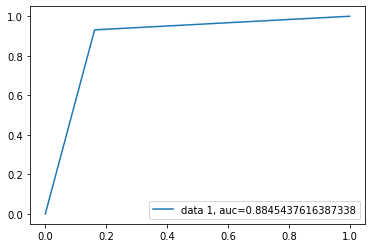

In [ ]:
#plotting ROC AUC curves 
fpr, tpr, _ = roc_curve(y_test, y_preds_proba_KNN)
auc = roc_auc_score(y_test, y_preds_proba_KNN)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Random Forests Classifier**

---



The logic behind the Random Forest model is that multiple uncorrelated models (the individual decision trees) perform much better as a group than they do alone. When using Random Forest for classification, each tree gives a classification or a “vote.” The forest chooses the classification with the majority of the “votes.” When using Random Forest for regression, the forest picks the average of the outputs of all trees.
In this classification algorithm, we will use cardiovascular patients  datasets to train and test the model. We will build a model to classify the wether person shows casrdiovascular risk or not.

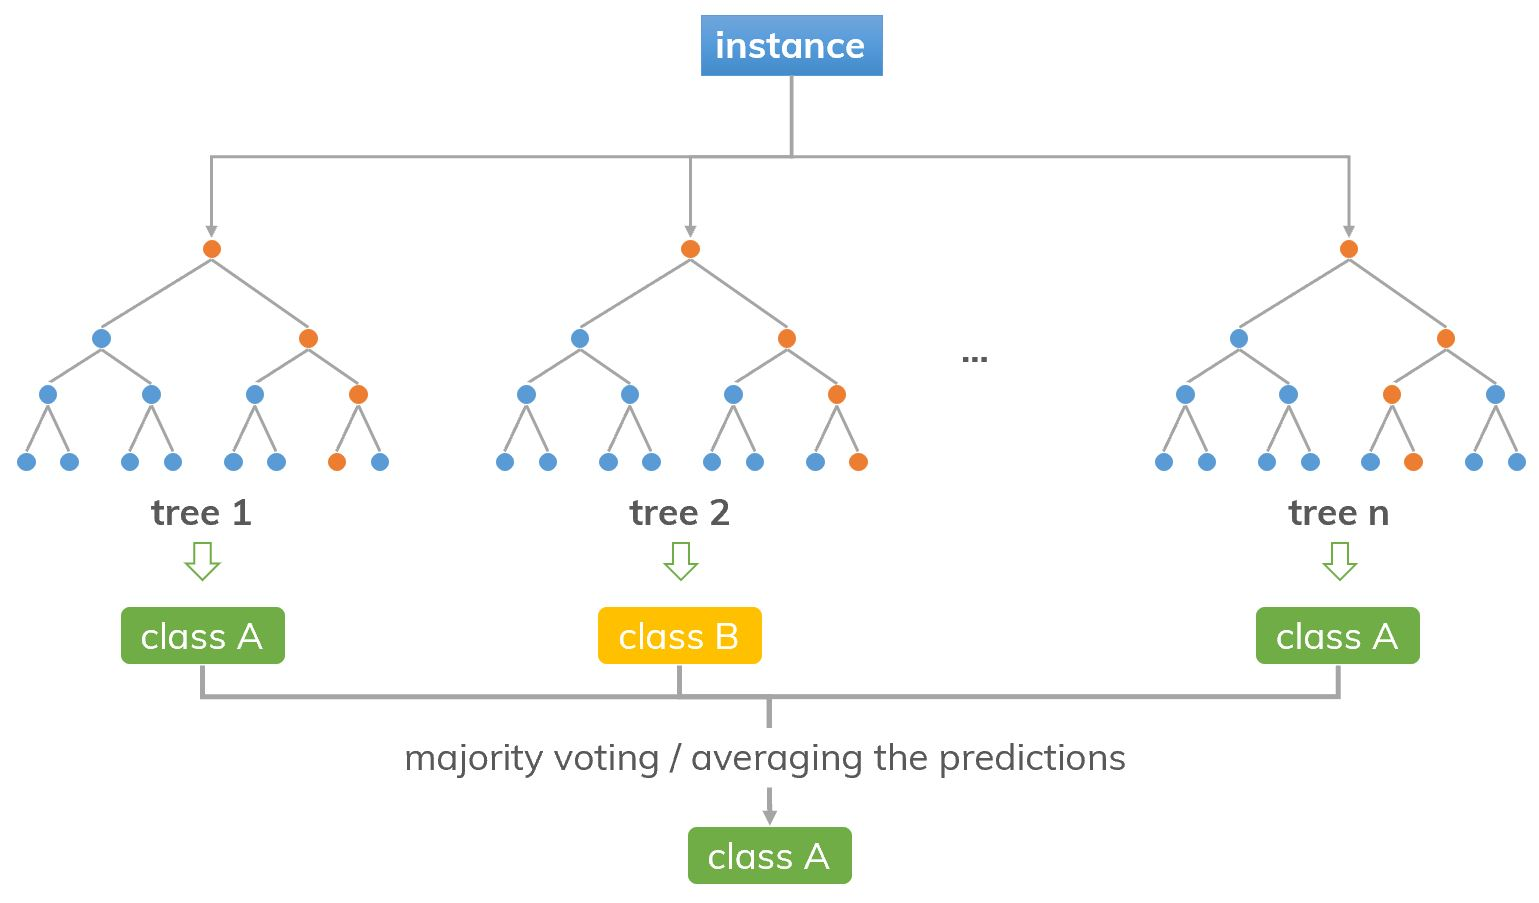

In [ ]:
#importing required packages
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [ ]:
## defining parameters range
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
# training the RandomForestClassifier model with GridSearchCV
randomforest_classifier= RandomForestClassifier(n_estimators=10)
rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
rf_clf.fit(X_train, y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
# calculating best score for classifier
rf_clf.best_score_

0.8907762994715315

In [ ]:
#signing classifier best estimators to optimal_rf_clf
optimal_rf_clf = rf_clf.best_estimator_

In [ ]:
y_pred_Test_RF_clf = optimal_rf_clf.predict(X_test)

In [ ]:
#signing Model Accuracy to the Accuracy_score
Accuracy_score=metrics.accuracy_score(y_test, y_pred_Test_RF_clf)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",Accuracy_score)

Accuracy: 0.9115456238361266


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random Forests',
       'Accuracy':round((Accuracy_score),2)}
training_df=training_df.append(dict1,ignore_index=True)

### **Confusion Matrix**

In [ ]:
#forming confusion matrix for Y_test and y_pred
confusion_matrix(y_test,y_pred_Test_RF_clf)

array([[503,  34],
       [ 61, 476]])

In [ ]:
#printing Probability for X_test 
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]
test_class_preds_rf = optimal_rf_clf.predict(X_test)


In [ ]:
#print the accuracy,precission,recall,f1,roc_score 
test_accuracy_rf = accuracy_score(test_class_preds_rf,y_test)
test_precision_score_rf = precision_score(test_class_preds_rf,y_test)
test_recall_score_rf = recall_score(test_class_preds_rf,y_test)
test_f1_score_rf = f1_score(test_class_preds_rf,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds_rf,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.9115456238361266
The precision on test data is  0.8864059590316573
The recall on test data is  0.9333333333333333
The f1 on test data is  0.9092645654250239
The roc_score on test data is  0.9125886524822695


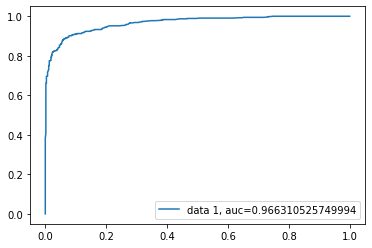

In [ ]:
#plotting ROC AUC curves 
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_preds_proba_rf)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Logistic Regression with GridSearchCV**

In [ ]:
#importing required packages
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
from sklearn.model_selection import GridSearchCV


In [ ]:
new_df=[]

In [ ]:
# defining parameter range and setting up the model
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
Lr_clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
Lr_clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [ ]:
#printing y_pred
y_pred_test_Lr_clf = Lr_clf.predict(X_test)

In [ ]:
# calculating best score for classifier
Lr_clf.best_score_

0.7966950783015975

In [ ]:
#signing Model Accuracy to the Accuracy_score
Accuracy_score=metrics.accuracy_score(y_test, y_pred_test_Lr_clf)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",Accuracy_score)

Accuracy: 0.7858472998137802


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Logistic Regression ',
       'Accuracy':round((Accuracy_score),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#signing classifier best estimators to optimal_Lr
optimal_Lr = Lr_clf.best_estimator_

### **Features importance**
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [ ]:
feature_importance = pd.DataFrame({'Features':col, 'Importance':np.abs(optimal_Lr.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]


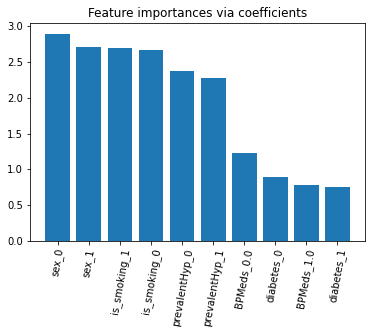

In [ ]:
#plotting the graph for feature importance
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

**from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are age, sysBP, glucose,cigsperDay, totChol, Sex_0 ,Sex_1, BMI, DaiBP, prevalentHyp_0**

In [ ]:
# Predicted Probability for X_test
y_preds_proba_lr = optimal_Lr.predict_proba(X_test)[::,1]
test_class_preds = optimal_Lr.predict(X_test)


In [ ]:
#print the accuracy,precission,recall,f1,roc_score 
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7858472998137802
The precision on test data is  0.6685288640595903
The recall on test data is  0.8734793187347932
The f1 on test data is  0.7573839662447257
The roc_score on test data is  0.8025013486584978


### **ROC AUC curve**



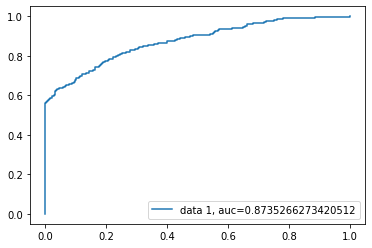

In [ ]:
#plotting ROC AUC curves 
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
df.head()

index  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentHyp  diabetes  \
0      1   36    1           0         0.0     0.0             1         0   
1      2   46    0           1        10.0     0.0             0         0   
2      3   50    1           1        20.0     0.0             1         0   
3      4   64    0           1        30.0     0.0             0         0   
4      5   61    0           0         0.0     0.0             1         0   

   totChol  sysBP    BMI  heartRate  TenYearCHD  glucose_median  
0    212.0  168.0  29.77       72.0           0            75.0  
1    250.0  116.0  20.35       88.0           0            94.0  
2    233.0  158.0  28.26       68.0           1            94.0  
3    241.0  136.5  26.42       70.0           0            77.0  
4    272.0  180.0  32.80       85.0           1            65.0

In [ ]:
dataset.head()

age  cigsPerDay  totChol  sysBP    BMI  heartRate  TenYearCHD  \
0   36         0.0    212.0  168.0  29.77       72.0           0   
1   46        10.0    250.0  116.0  20.35       88.0           0   
2   50        20.0    233.0  158.0  28.26       68.0           1   
3   64        30.0    241.0  136.5  26.42       70.0           0   
4   61         0.0    272.0  180.0  32.80       85.0           1   

   glucose_median  sex_0  sex_1  is_smoking_0  is_smoking_1  BPMeds_0.0  \
0            75.0      0      1             1             0           1   
1            94.0      1      0             0             1           1   
2            94.0      0      1             0             1           1   
3            77.0      1      0             0             1           1   
4            65.0      1      0             1             0           1   

   BPMeds_1.0  prevalentHyp_0  prevalentHyp_1  diabetes_0  diabetes_1  
0           0               0               1           1           0  
1           0               1               0           1           0  
2           0               0               1           1           0  
3           0               1               0           1           0  
4           0               0               1           1           0

### **Building a Predictive System**

---



In [ ]:
#creating input data as per features in the dataset
input_data = (36,0,212,168,29.77,72,75,0,1,1,0,1,0,0,1,1,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 1):
  print('The Person show cardiovascular risk')
else:
  print('The Person doesnot show cardiovascular risk')

[1]
The Person show cardiovascular risk


## **CONCLUSION**
we started our project by importing data and then we handeled missing values and duplicates.further we went to analysis During the time of our analysis, we initially did EDA on all the features of our datset.. We first analysed our dependent variable, 'TenYearCHD'. Next we analysed categorical variable and dropped the variable who were not co-related, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features and hot encoded the categorical variables.

Next we implemented 3 machine learning algorithms Kneighbour clasiifier, Random Forest and Logistic regression. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [ ]:
# displaying the Accuracy values for all models
result=training_df
result

Model  Accuracy
0  KNeighbors classifier     0.885
1         Random Forests     0.910
2   Logistic Regression      0.790

 * number of females showing cardiovascular risk was more than number of male
 * A people showing cardiovascular risk as well as prevalentstroke were very few
 * Age was the most important feature for our machine learning models
 * **Logistic Regression gave the accuracy of  87% on test dataset.**
 * In general, all models have comparable accuracy. Nevertheless, because the classes were imbalanced this metric was misleading.
 *  KNeighbors classifier and Logistic Regression  are gave  us the best_score 86.10, 87.00 among other algorithms
 * ROC Score values of KNeighbors classifier,Random Forests,Logistic Regression  60.46, 64.74, and 69.56 approx equal 
 * **We can conclude that these two algorithms KNeighbors classifier,Logistic Regression  are the best to predict whether the person showing cardiovascular risk or not from our analysis.**




## **Creating a pickle File**

---
Pickle is a Standard way of serializing objects in Python. It can be a Machine Learning Algorithm You can serialize and save the model or Object using Pickle . It is saved in a serialized format as a file.When you need to re-use or re-load the same Model or Object , you can reload and de-serialize the file using Pickle



In [ ]:
#importing pickle
import pickle

In [ ]:
#creating pickle file 
with open('model_pickle','wb') as file:
    pickle.dump(KNN_clf,file)
